## CV Basics

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys,os
sys.path.append("/projects/computer-vision/")

In [3]:
import utils.cv_utils as cvu
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt

In [4]:
matplotlib.use("TkAgg")

In [5]:
%matplotlib inline
plt.ion()

In [6]:
img = cv.imread("../opencv-course/Resources/Photos/cat.jpg")

In [7]:
img.shape

(427, 640, 3)

In [8]:
# cv.imshow('Cat', img)
# cv.waitKey(0)

In [9]:
# cvu.cv_imshow('Cat', img)

In [10]:
import numpy as np

In [11]:
# Reading videos

In [12]:
capture = cv.VideoCapture('../opencv-course/Resources/Videos/dog.mp4')
#can use 0, 1, 2 (computer camera inputs)

In [13]:
# while True:
#     isTrue, frame = capture.read()
#     if frame is None:
#         break
#     cv.imshow('Video', cvu.resize(frame))
    
#     if cv.waitKey(20) & 0xFF==ord('d'):
#         break

# capture.release()
# cv.destroyAllWindows()

### Drawing on images

In [14]:
# Drawing on standalone images
# Creating blank images

In [15]:
blank = np.zeros((500, 500, 3), dtype=np.uint8)

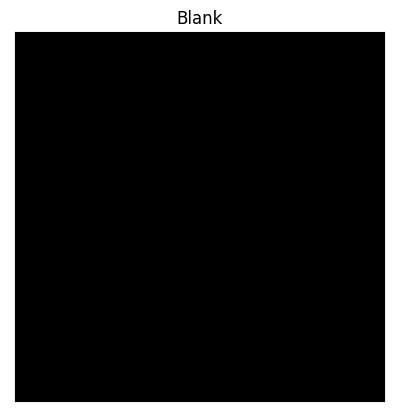

In [16]:
cvu.cv_imshow('Blank', blank)

In [17]:
# Painting a blank image
blank[:] = 255, 255, 0

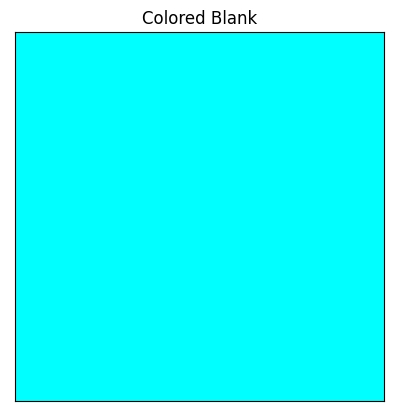

In [18]:
cvu.cv_imshow('Colored Blank', blank)

In [19]:
# Coloring a portion of an image. Giving a range
blank[200:300, 400: 500] = 0, 255, 0

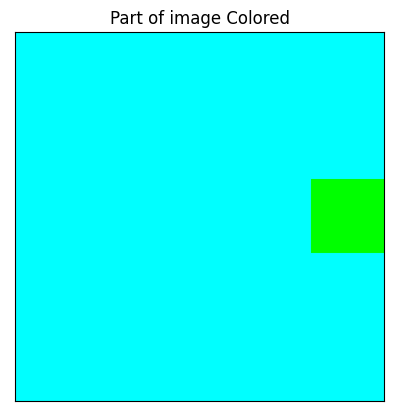

In [20]:
cvu.cv_imshow('Part of image Colored', blank)

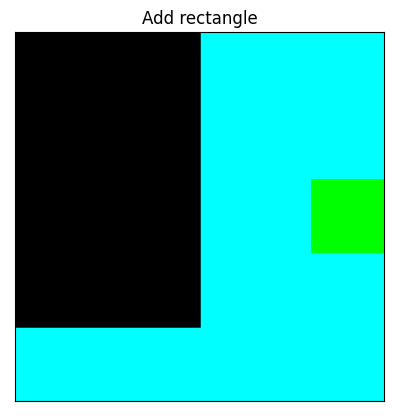

In [21]:
cv.rectangle(blank, (0, 0), (250, 400), (0, 0, 0), thickness=cv.FILLED)
cvu.cv_imshow('Add rectangle', blank)

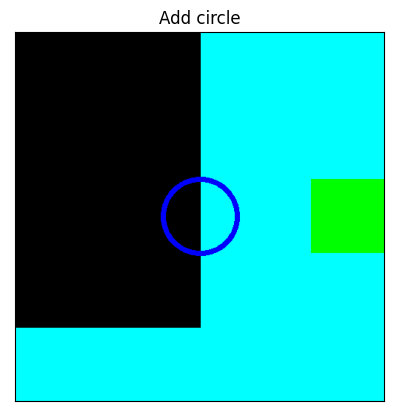

In [22]:
cv.circle(blank, (blank.shape[0]//2, blank.shape[1]//2), 50, (255, 0, 0), thickness=5)
cvu.cv_imshow('Add circle', blank)

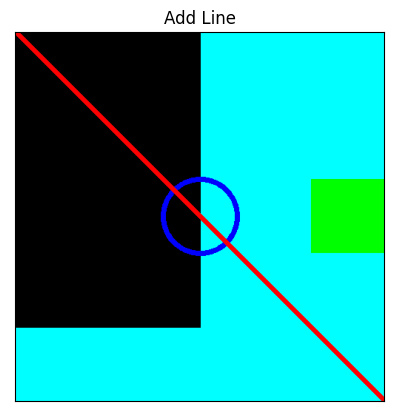

In [23]:
cv.line(blank, (0,0), (500, 500), (0, 0, 255), 5)
cvu.cv_imshow('Add Line', blank)

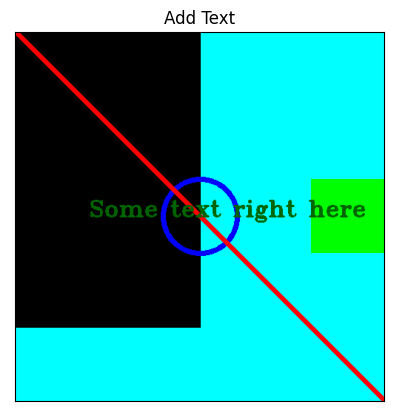

In [24]:
cv.putText(blank, 'Some text right here', (100, 250), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0, 100, 0), 2)
cvu.cv_imshow('Add Text', blank)

### Essential functions in CV

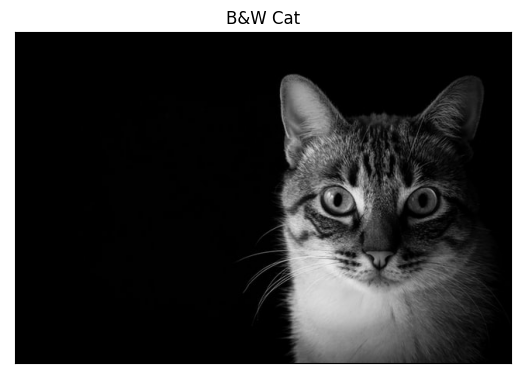

In [25]:
# Converting an image to grayscale (B&W)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cvu.cv_imshow('B&W Cat', gray)

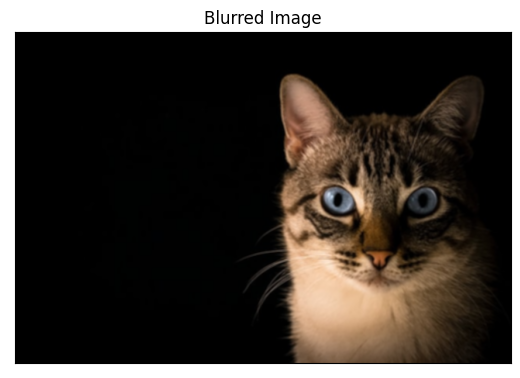

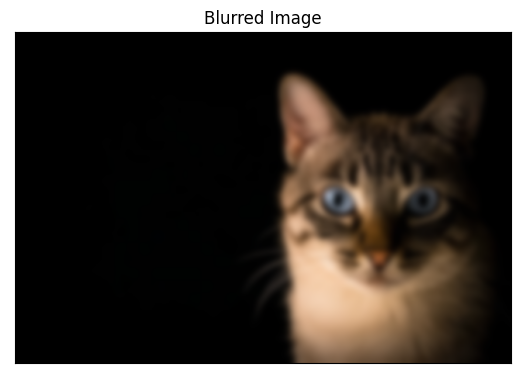

In [27]:
# Blurring an image
# Can reduce some of the noise in the image (applying slight blur)
blurred_img = cv.GaussianBlur(img, (3, 3), cv.BORDER_DEFAULT)
cvu.cv_imshow('Blurred Image', blurred_img)
blurred_img = cv.GaussianBlur(img, (333, 333), cv.BORDER_DEFAULT)
cvu.cv_imshow('Blurred Image', blurred_img)

In [31]:
park_img = cv.imread("../opencv-course/Resources/Photos/park.jpg")

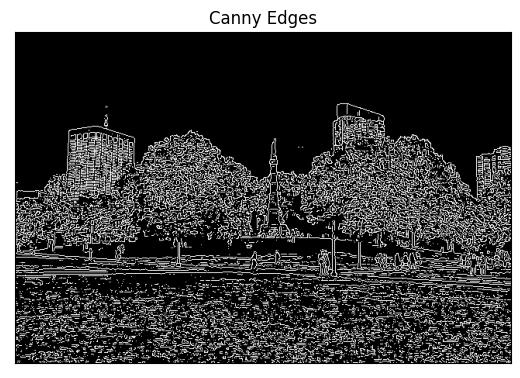

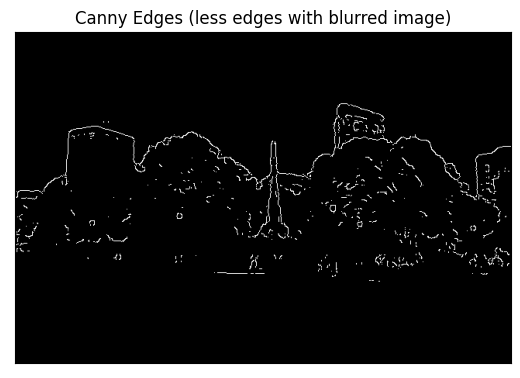

In [43]:
# Edge cascade
# Find the edges that are present in the image
canny = cv.Canny(park_img, 125, 125)
cvu.cv_imshow('Canny Edges', canny)
park_blurred = cv.GaussianBlur(park_img, (7, 7), cv.BORDER_DEFAULT)
canny_less_edges = cv.Canny(park_blurred, 125, 125)
cvu.cv_imshow('Canny Edges (less edges with blurred image)', canny_less_edges)

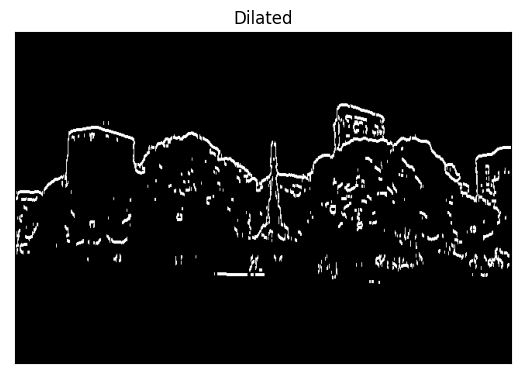

In [44]:
# Dillating an image
dilated_img = cv.dilate(canny_less_edges, (7, 7), iterations=3)
cvu.cv_imshow('Dilated', dilated_img)

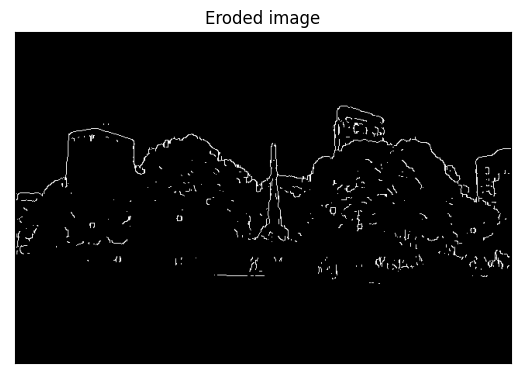

In [45]:
# Trying to retrieve the original image (a less dilated image)
eroded_img = cv.erode(dilated_img, (7, 7), iterations=3)
cvu.cv_imshow('Eroded image', eroded_img)

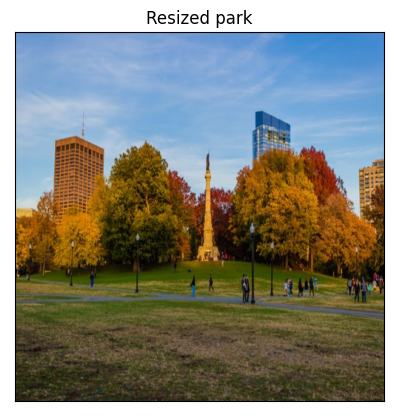

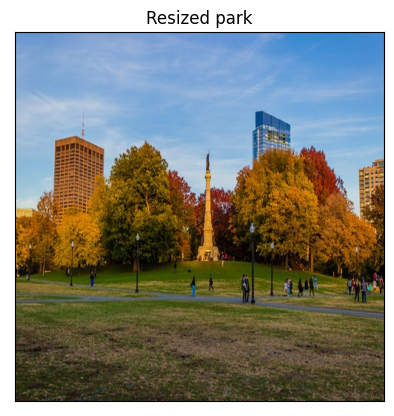

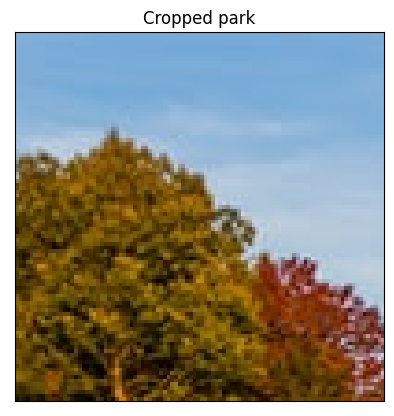

In [49]:
# Resize and crop an image
# Resize
park_resized = cv.resize(park_img, (500, 500))
cvu.cv_imshow('Resized park', park_resized)

# Sacling the image with interpolation
park_resized = cv.resize(park_img, (500, 500), interpolation=cv.INTER_CUBIC)
cvu.cv_imshow('Resized park', park_resized)

# Cropping
cropped_img = park_img[100:200, 200:300]
cvu.cv_imshow("Cropped park", cropped_img)

### Basic image transforations

In [52]:
# Translation

def translate(src, x_shift, y_shift):
    translation = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    dimensions = (src.shape[1], src.shape[0])
    return cv.warpAffine(src, translation, dimensions)

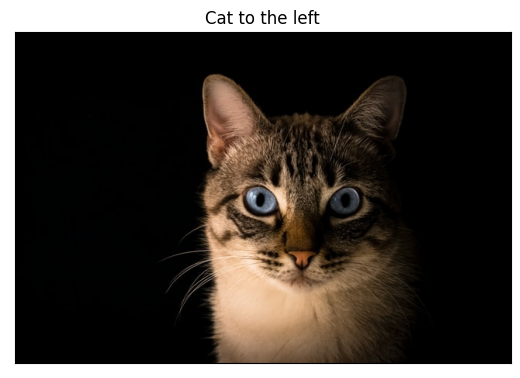

In [55]:
translated = translate(img, -100, 0)
cvu.cv_imshow('Cat to the left', translated)

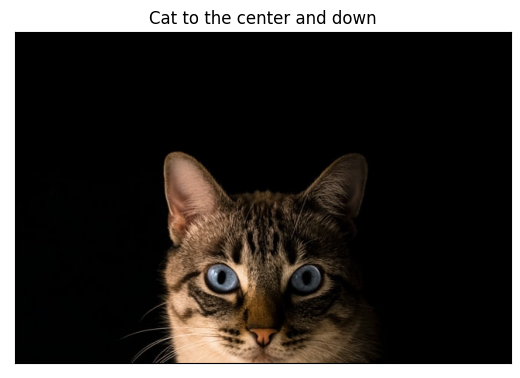

In [57]:
translated = translate(img, -150, 100)
cvu.cv_imshow('Cat to the center and down', translated)

In [58]:
def rotate(src, angle, rotPoint=None):
    (height, width) = src.shape[:2]
    if rotPoint is None:
        rotPoint = (width//2, height//2)
    
    rotation = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width, height)

    return cv.warpAffine(src, rotation, dimensions)

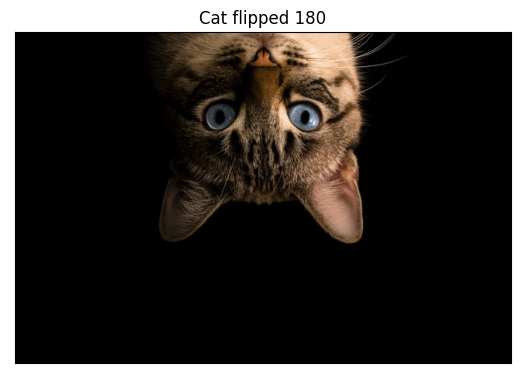

In [60]:
rotated = rotate(translated, 180) # positive => ccounterclockwise, negative => clockwise
cvu.cv_imshow('Cat flipped 180', rotated) # rotation includes some blank areas in the resulting image

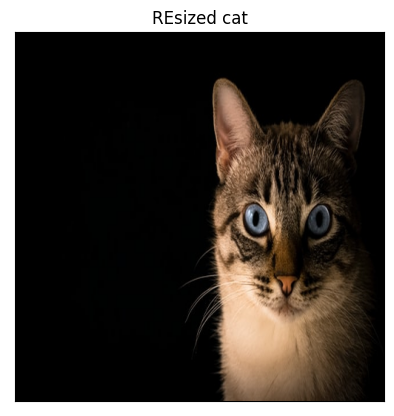

In [62]:
# Resizing
resized = cv.resize(img, (500, 500), interpolation=cv.INTER_CUBIC)
cvu.cv_imshow('REsized cat', resized)

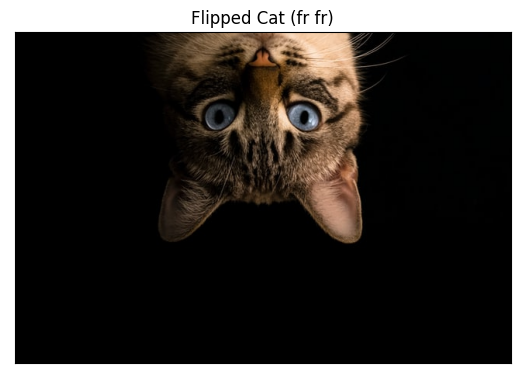

In [66]:
# Flipping
cvu.cv_imshow('Flipped Cat (fr fr)', cv.flip(translated, -1))

### Identifying contours

In [ ]:
# They are not edges mathematically
# Idea of contours

In [67]:
cats_img = cv.imread('../opencv-course/Resources/Photos/cats 2.jpg')

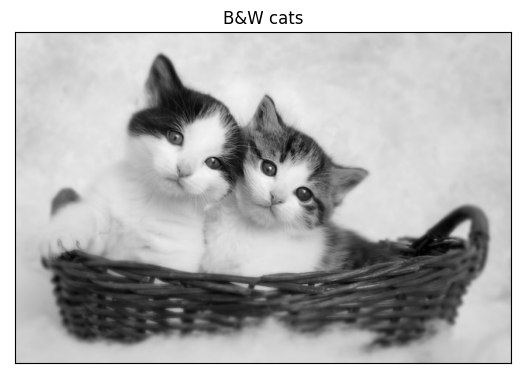

In [68]:
gray = cv.cvtColor(cats_img, cv.COLOR_BGR2GRAY)
cvu.cv_imshow('B&W cats', gray)

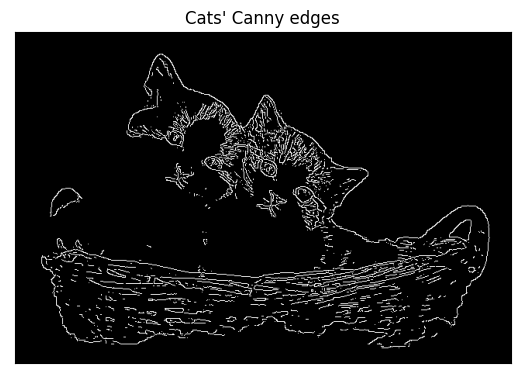

In [70]:
canny_edges = cv.Canny(cats_img, 125, 125)
cvu.cv_imshow("Cats' Canny edges", canny_edges)

In [72]:
# Finding the contours
contours , hierarchies = cv.findContours(canny_edges, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
#Returns 2 values (python list of all the coordinates of the contours) and the hierarchy of the contours
# RETR_LIST: Returns all contours/ RETR_TREE: all hierarchical contours, RETR_EXTERNAL: all the external
# CHAIN_APPROX_NONE: no approximation return all points of contours. APPROX_SIMPLE: compression into 2 points (a line)

In [73]:
print(f'The image has {len(contours)} contours')

The image has 1035 contours


In [74]:
contours , hierarchies = cv.findContours(canny_edges, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'The image has {len(contours)} contours')

The image has 1035 contours


In [76]:
blurred = cv.GaussianBlur(cats_img, (5, 5), cv.BORDER_DEFAULT)
canny_edges_blurred = cv.Canny(blurred, 125, 125)
contours , hierarchies = cv.findContours(canny_edges_blurred, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'The image has {len(contours)} contours')

The image has 300 contours


In [78]:
ret, th_img = cv.threshold(gray, 125, 255, cv.THRESH_BINARY) # bounds: th=125, max_value=255. The function returns binary image
contours, hierachies = cv.findContours(th_img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'The image has {len(contours)} contours')

The image has 155 contours


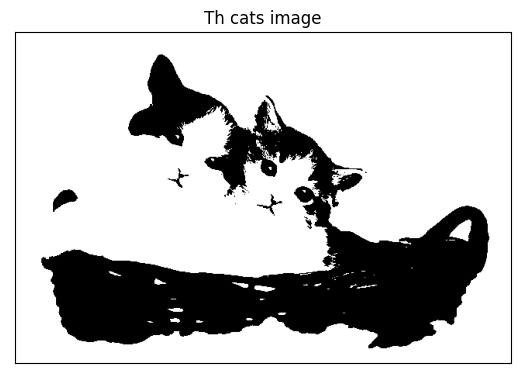

In [79]:
cvu.cv_imshow("Th cats image", th_img)

In [ ]:
# Drawing the contours to visualize them

In [82]:
analysis_layer = np.zeros(cats_img.shape, dtype=np.uint8)

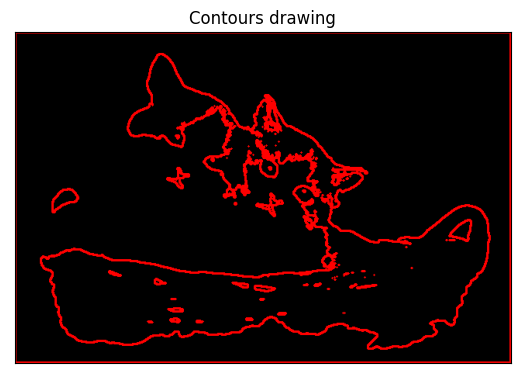

In [83]:
cv.drawContours(analysis_layer, contours, -1, (0, 0, 255), 2)
cvu.cv_imshow("Contours drawing", analysis_layer) #basically the edges of the thresh images (not really)

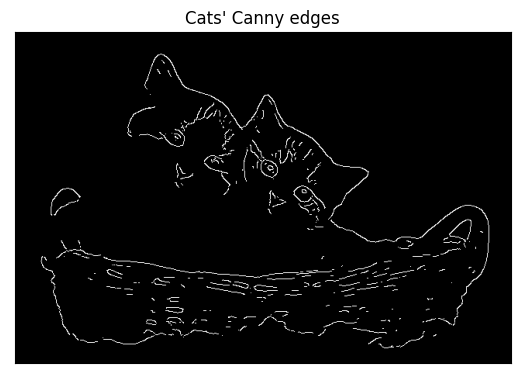

In [85]:
cvu.cv_imshow("Cats' Canny edges", canny_edges_blurred)

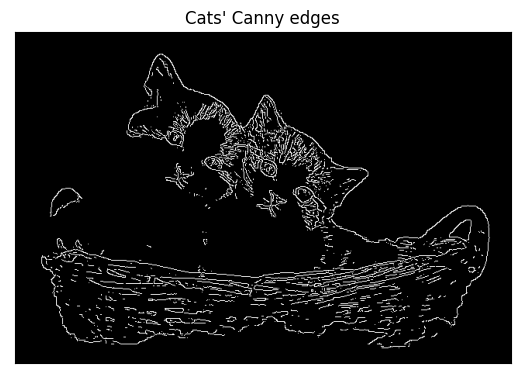

In [84]:
cvu.cv_imshow("Cats' Canny edges", canny_edges)